# **An introduction to bivariate signal processing: polarization, quaternions and geometric representations**
# *Eusipco Tutorial, Lyon 2024*


---



---



# **Notebook III**: ℍ-embedding and time-frequency representations
#### (Part of the material presented here is from [Bispy tutorial](https://bispy.readthedocs.io/en/latest/tutorials/index.html))
---
---
**Related publication**

- “*Time-frequency analysis of
bivariate signals*”, J. Flamant, N. Le Bihan and P. Chainais., Applied and Computational Harmonic Analysis (ACHA), vol. 46, issue 2, pp. 351-383, 2019.
[link to the paper](https://hal.science/hal-01362586/file/1609.02463v1.pdf)

---
---

## Set up/imports


First install the ``bispy-polar`` package from PyPi. It will install the necessary dependencies. We also need the package ``requests`` for downloading some data. 

In [ ]:
!pip install bispy-polar
!pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.7/190.7 kB 3.0 MB/s eta 0:00:00


Second, import the BiSPy package and other relevant packages

In [1]:
import bispy as bsp
import numpy as np
import matplotlib.pyplot as plt
import quaternion
import scipy.signal as sg


import requests
import io


We are good to go now.

## Road map

**What we will be doing in this notebook** :

1. Generate the ℍ-embedding of a bivariate signal we are given, then compute and display its geometric attributes: modulus and phases.
2. Construct a quaternion valued signal (ℍ-embedding) by parametrization of its geometric attributes
3. Extract the Stokes parameters of the ℍ-embedding
4. Compute the Q-STFT (Short Time Fourier Transform) of a bivariate signal and display its time-frequency Stokes parameters



# **1. ℍ-embedding of a bivariate signal**


---



As a first example, we are going to load and analyze a bivariate signal

In [2]:
# Version 1: we upload a bivariate signal corresponding to a polarized gravitational waveform
# uncomment the line below if option 1 is chosen


# for remote use 
response = requests.get('https://github.com/ricochet-anr/2024_eusipco_tutorial_bivariate_signal_processing/raw/main/data/GW-bivariate-strain.npy')
response.raise_for_status()
sig = np.load(io.BytesIO(response.content))

# local use only
# sig = np.load('../data/GW-bivariate-strain.npy')


t_sig = np.linspace(0, 1, len(sig))


The easy way to construct a ℍ-embedding using bispy

In [3]:
# Input must be a quaternion valued signal
# Make use of the sympSynth function to convert a complex signal to a quaternion signal

sig_q = bsp.utils.sympSynth(np.real(sig),np.imag(sig))

# Now compute the H-embedding of the signal

Hemb_sig = bsp.timefrequency.Hembedding(sig_q)

# The Hemb_gw has several attributes. Among them, the first basic ones are

# "Hembedding" is the "full" quaternion signal
# "signal" is the original complex signal (a quaternion array with two zero arrays)


In [4]:
print('The H-embedding :',Hemb_sig.Hembedding)
print('----')
print('----')
print('The original signal :',Hemb_sig.signal)

The H-embedding : [quaternion(-2.24203064356828e-17, -2.68140021986864e-19, 4.85679287038282e-17, 3.05418557176459e-18)
 quaternion(-2.24178565177019e-17, -2.7780578623235e-19, 3.42670930544826e-17, 2.90458630456675e-18)
 quaternion(-2.24152989433007e-17, -2.87470323386868e-19, 3.42411798614087e-17, 2.91931492224134e-18)
 ...
 quaternion(-5.4320945381886e-24, 5.11174546041389e-26, 3.43728255894466e-17, 2.83282486842248e-18)
 quaternion(5.43209455299995e-24, -5.11174478676482e-26, 3.43475540970431e-17, 2.84760099016068e-18)
 quaternion(-5.43209455201976e-24, 5.11174657464463e-26, 4.85950331193103e-17, 3.03327868456673e-18)]
----
----
The original signal : [quaternion(-2.24203118677773e-17, -2.68139970869374e-19, 0, 0)
 quaternion(-2.24178510856073e-17, -2.77805837349816e-19, 0, 0)
 quaternion(-2.24153043753952e-17, -2.87470272269431e-19, 0, 0) ...
 quaternion(-0, 0, 0, 0) quaternion(-0, 0, 0, 0) quaternion(-0, 0, 0, 0)]


**Some other attributes are available** :

*   *a(t)* : instantaneous amplitude
*   *θ(t)* : instantaneous orientation
*   *χ(t)* : instantaneous ellipticity
*   *φ(t)* : instantaneous phase


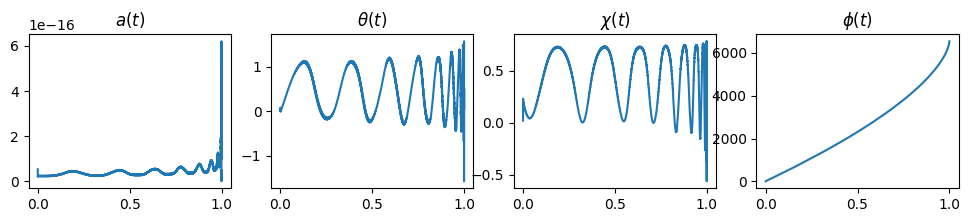

In [5]:
# Let's display the attributes

fig,ax = plt.subplots(nrows=1, ncols=4,figsize=(12,2))
ax[0].plot(t_sig, Hemb_sig.a);ax[0].title.set_text(r'$a(t)$')
ax[1].plot(t_sig, Hemb_sig.theta);ax[1].title.set_text(r'$\theta(t)$')
ax[2].plot(t_sig, Hemb_sig.chi);ax[2].title.set_text(r'$\chi(t)$')
ax[3].plot(t_sig, np.unwrap(Hemb_sig.phi));ax[3].title.set_text(r'$\phi(t)$')

**A slightly more complicated way (and less practical !)**:

we can compute the ℍ embedding of the signal "by hand".





In [6]:
# Display u anv components

# Our signal of interest is gw, it is bivariate, stored as a complex signal
# First we compute the analytic signals of the two components of gw
u_sig = sg.hilbert(np.real(sig)) # Analytic signal of the first component : u(t)
v_sig = sg.hilbert(np.imag(sig)) # Analytic signal of the second component : v(t)

# Now, the H-embedding of gw, denoted GW, is constructed using the sympSynth function from two complex signals

SIG = bsp.utils.sympSynth(u_sig,v_sig) # GW is now a quaternion valued signal

# It is a quaternion valued signal. However it is not a "Hembedding" object, meaning that we
# can not have access to the attributes directly.

**Display of a bivariate signal**

Warning : input signal must be quaternion-valued

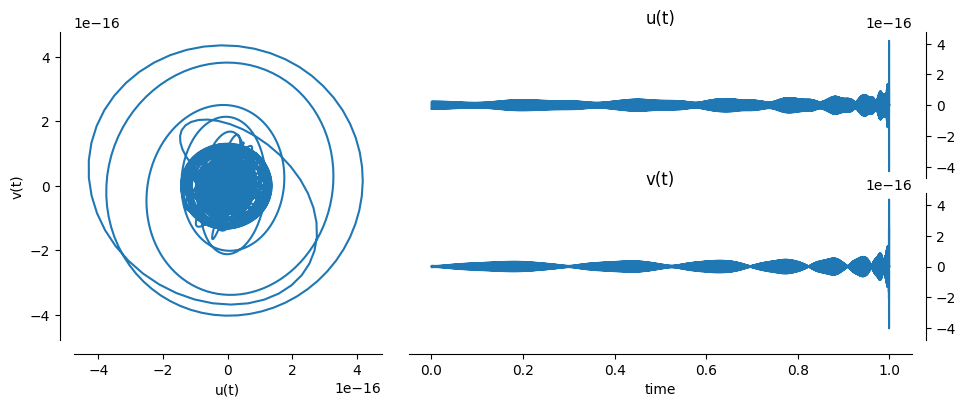

In [7]:
# We can display its components using plot2D in bsp.utils.visual
bsp.utils.visual.plot2D(t_sig, SIG);

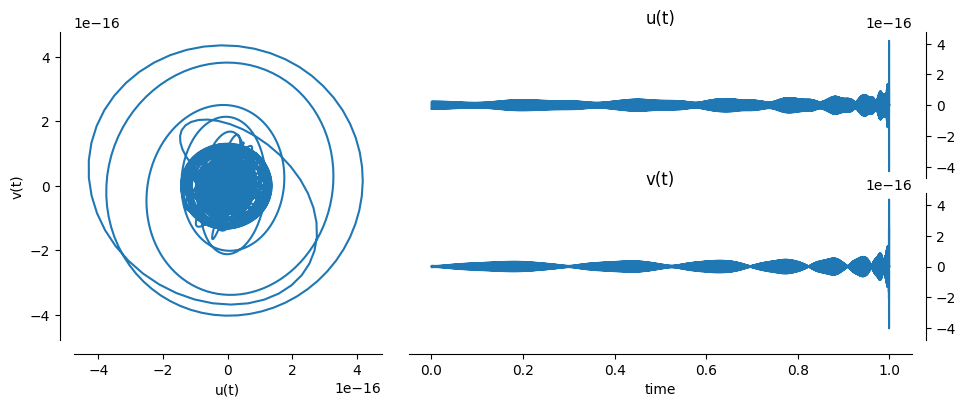

In [8]:
# Using the Hembedding, one needs to use the signal attribute
bsp.utils.visual.plot2D(t_sig ,Hemb_sig.signal);

# **2. Constructing a ℍ-embedding signal**


---



It is possible to construct a bivariate signal using parametrization of its ℍ-embedding. We will construct a bivariate AMFM signal by designing the time series associated to its envelope/magnitude $a(t)$ and phases $\theta(t)$, $\chi(t)$ and $\varphi(t)$. Then, the ℍ-embedding is:
$$ q(t) = a(t) e^{i \theta(t)} e^{-k \chi(t)} e^{j \varphi(t)}$$
Once the parameters are defined, the construction is made using the ``bsp.signals.bivariateAMFM`` function.

In [9]:
N = 2048 # number of samples of the signal

# Signal frequency parameters (coefficients for the lienar evolution of the instantaneous frequency)
c = 130*np.pi
d = 250*np.pi

# time vector
t = np.linspace(0, 1, N)

theta = (np.pi/5)*10*t # rotating orientation
chi = 0 # constant null ellipticity
phi = c*t**2+d*t**(7/2) # chirp (inst. phase evolution)

# Envelope/amplitude evolution with bispy "utils" tool
env = bsp.utils.windows.hanning(N)

# Construction of the signal with bispy "signals" tool
#
# The bivariateAMFM function takes 4 arguments and returns a quaternion signal
#
x = bsp.signals.bivariateAMFM(env, theta, chi, phi)

Displaying the bivariate signals in time
Display of $u(t)$ and $v(t)$ together with v as a function of u along time

Display using ``bispy.visual.plot2D`` function

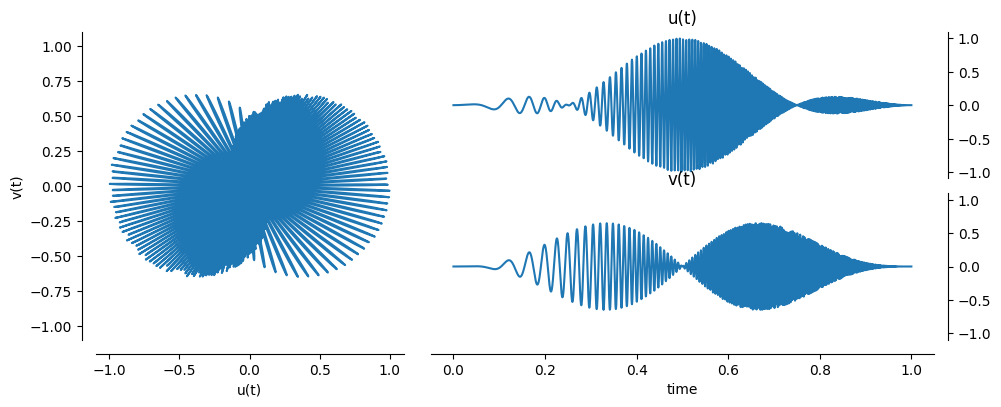

In [10]:
fig, ax = bsp.utils.visual.plot2D(t, x)

From the geometric parameters, we can directly get the Stokes parameters of the bivariate signal.

In [11]:
S0,S1,S2,S3 = bsp.utils.geo2Stokes(env, theta, chi, Phi=1)

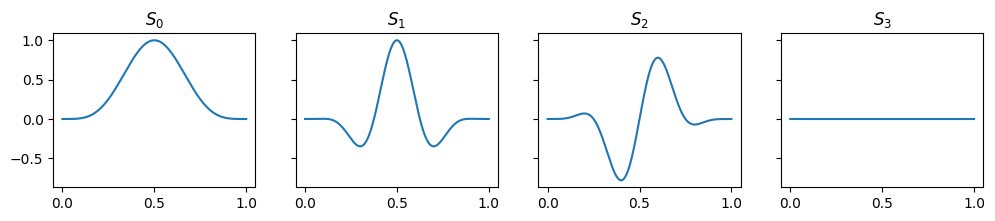

In [12]:
fig,ax = plt.subplots(nrows=1, ncols=4,figsize=(12,2),sharey=True)
ax[0].plot(t,S0);ax[0].title.set_text(r'$S_0$')
ax[1].plot(t,S1);ax[1].title.set_text(r'$S_1$')
ax[2].plot(t,S2);ax[2].title.set_text(r'$S_2$')
ax[3].plot(t,S3);ax[3].title.set_text(r'$S_3$')

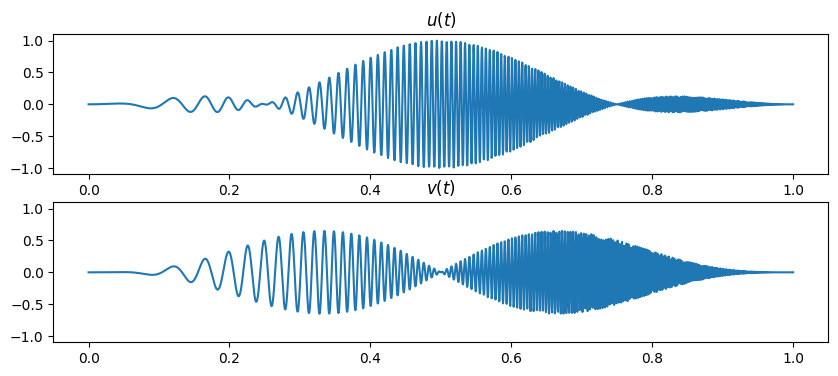

In [13]:
# We can also extract the two components of a H-embedding with the sympSplit function
# We get two complex (analytic) signals which are the analytic versions of the components
# of the bivariate signal.

u_x,v_x = bsp.utils.sympSplit(x)

# we can plot them to compare with the plot2D we made previously
fig,ax = plt.subplots(nrows=2, ncols=1,figsize=(10,4),sharey=True)
ax[0].plot(t,np.real(u_x));ax[0].title.set_text(r'$u(t)$')
ax[1].plot(t,np.real(v_x));ax[1].title.set_text(r'$v(t)$')
# Note : the sympSplit function output two complex signals. Here we only plot the real part of each of these.

We can also wish to get back to the original 4 parameters.
An easy way is to built the Hembedding object

In [14]:
Hemb_x = bsp.timefrequency.Hembedding(x)

And then display the attributes

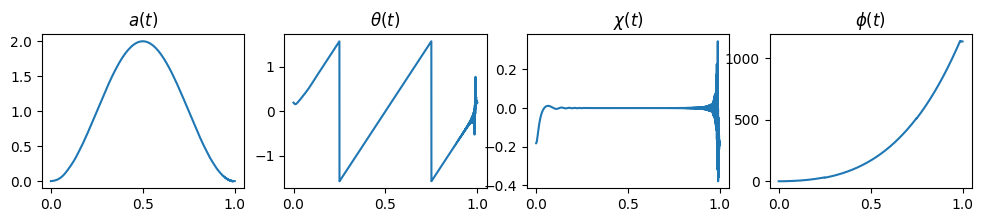

In [15]:
fig,ax = plt.subplots(nrows=1, ncols=4,figsize=(12,2))
ax[0].plot(t,Hemb_x.a);ax[0].title.set_text(r'$a(t)$')
ax[1].plot(t,Hemb_x.theta);ax[1].title.set_text(r'$\theta(t)$')
ax[2].plot(t,Hemb_x.chi);ax[2].title.set_text(r'$\chi(t)$')
ax[3].plot(t,np.unwrap(Hemb_x.phi));ax[3].title.set_text(r'$\phi(t)$')

We now turn to the time frequency representation of a bivariate signal using the Quaternion Short Time Fourier Transform

# **3. Time-frequency analysis of a bivariate signal**



---



In [16]:
# GW signal is very long (Gravitational Wave strain simulation have millions of samples)
# We are going to sub-sample the signal to save time...
dec_rate = 500 # decimation rate
SIG_dec = bsp.utils.sympSynth(sg.decimate(u_sig, dec_rate), sg.decimate(v_sig, dec_rate)) # decimate is not available in bispy
t_dec = sg.decimate(t_sig, dec_rate)

And we now turn to its time-frequency representation using the QSTFT (Quaternion Short Time Fourier Transform) function

In [17]:
S_sig = bsp.timefrequency.QSTFT(SIG_dec, t_dec)
# S_gw is the Time-Frequency representation (S stands for Spectrogram) object
N_dec =len(SIG_dec)

We can compute the Time-Frequency Stokes parameters of GW_dec using the "compute" method of S_gw


In [18]:
S_sig.compute(window='hamming', nperseg=101, noverlap=100, nfft=N_dec)

Computing Time-Frequency Stokes parameters


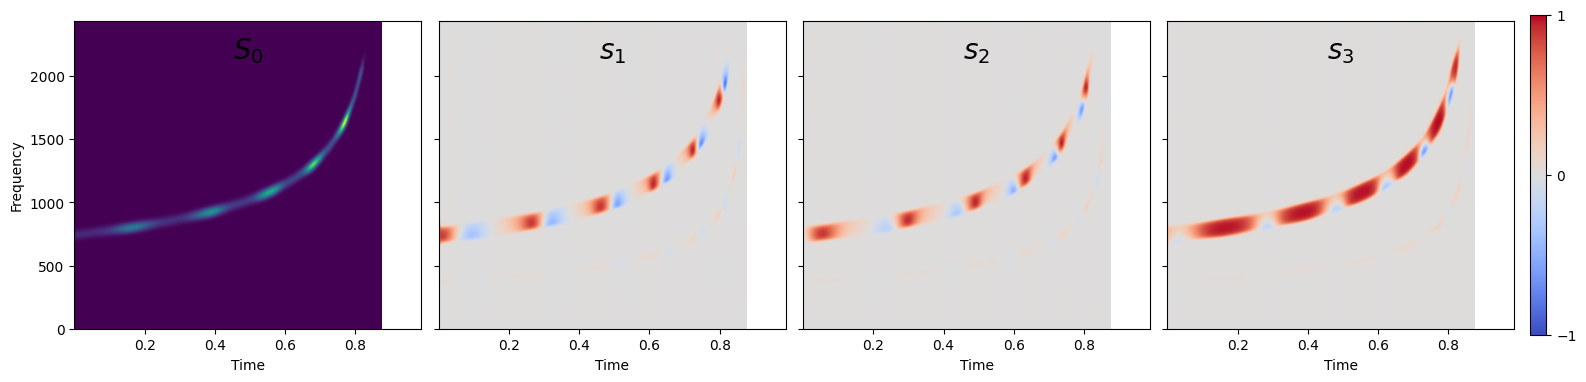

In [19]:
# Now we can plot the time-frequency Stokes parameters of our signal
fig, ax = S_sig.plotStokes()

Computing Time-Frequency Stokes parameters


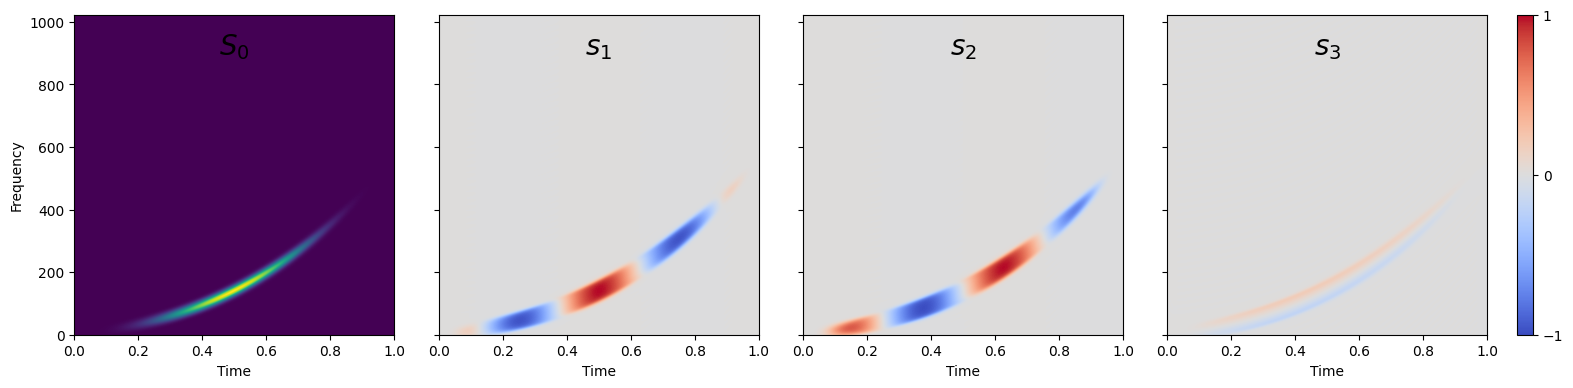

In [20]:
# We can do the same with the bivariate signal x we constructed
S_x = bsp.timefrequency.QSTFT(x, t)
S_x.compute(window='hamming', nperseg=101, noverlap=100, nfft=N)
fig, ax = S_x.plotStokes()

An other way to represent the information in the time frequency domain is to use the modulus and phase parameters rather than the Stokes parameters.
This is done using two functions : extracridges and Plotridges

Extracting ridges
Ridge added
Ridge added
Ridge added
Ridge added
Ridge added
Ridge added
6 ridges were recovered.


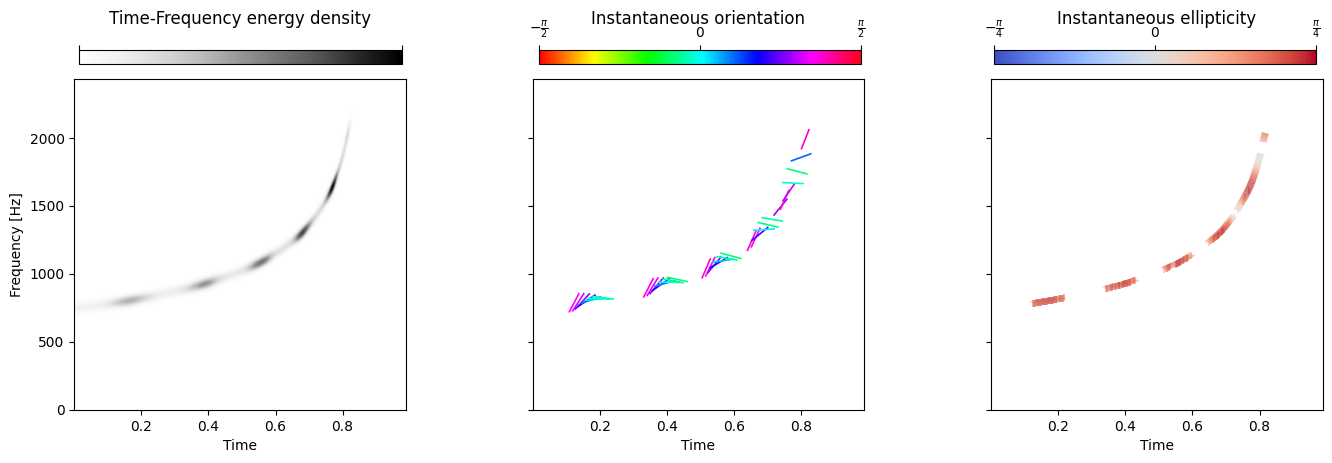

In [21]:
# for the GW
S_sig.extractRidges()
fig, ax = S_sig.plotRidges(quivertdecim=60)


Extracting ridges
Ridge added
1 ridges were recovered.


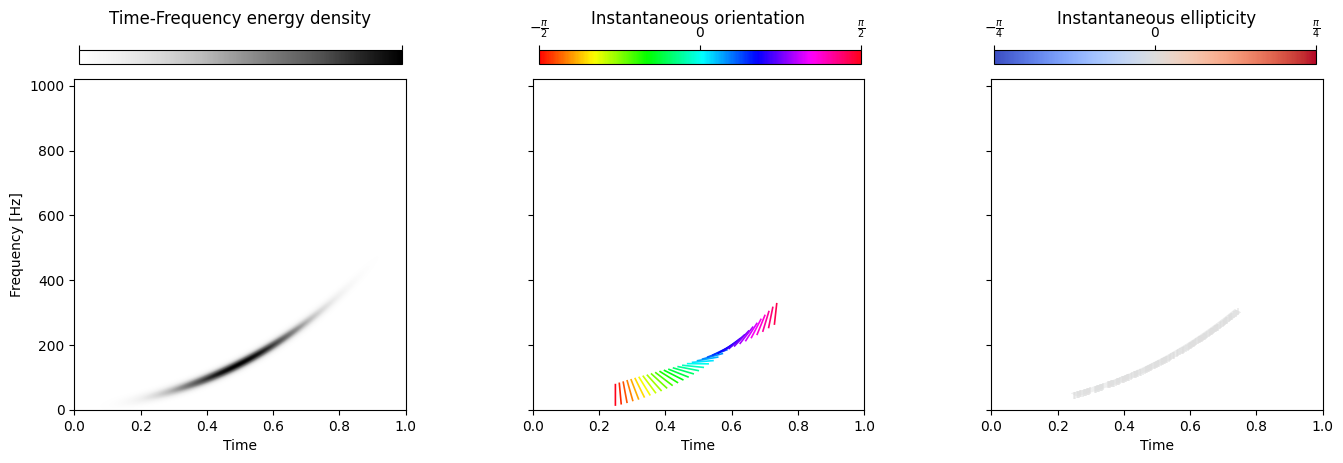

In [22]:
# for our signal x
S_x.extractRidges()
fig, ax = S_x.plotRidges(quivertdecim=30)

**Now you have the basic tools to play with non-stationary bivariate signals !**

There is a few more functions to discover in bispy as well... Make your way to the [Bispy tutorial](https://bispy.readthedocs.io/en/latest/tutorials/index.html).